## Problem Statement

### Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

# Import Libraries

In [341]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

#------------------------------------------------------

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

pd.set_option("display.float_format", lambda x: "%.5f" % x)

## Loading the dataset

In [234]:
Hotel = pd.read_csv(r"C:\Users\ADMIN\Downloads\INNHotelsGroup.csv")

In [350]:
# copying data to another variable to avoid any changes to original data
df = hotel.copy()

# Data Overview and Sanity Check

In [352]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


In [353]:
data.shape

(36275, 18)

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [355]:
# checking for null values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [356]:
# checking for duplicate values
data.duplicated().sum()

10275

In [366]:
# drop Booking_ID because we dont need it
df= df.drop(["Booking_ID"], axis=1)

In [367]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10476,0.39466,0.00000,0.00000,0.00000,0.00000,3.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000



* The dataset has 36275 rows and 19 columns. 
* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.
* There are no null values in the dataset.
* There are no duplicate values in the data.
* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* We have two years of data, 2017 and 2018.
* At least 75% of the customers are not repeating customers.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

# Exploratory Data Analysis

**The below functions need to be defined to carry out the EDA.**

In [368]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  


In [369]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    plt.figure(figsize=(count + 2, 6) if n is None else (n + 2, 6))
    plt.xticks(rotation=90, fontsize=15)
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()
        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()


In [370]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [371]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


## 1 Univariate Analysis

#### Observations on lead time

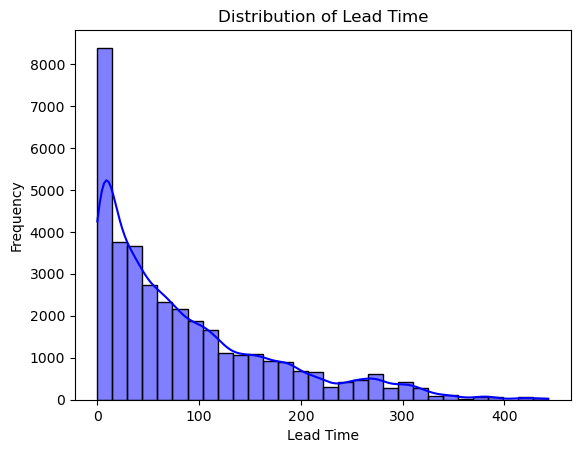

In [372]:
sns.histplot(df['lead_time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()


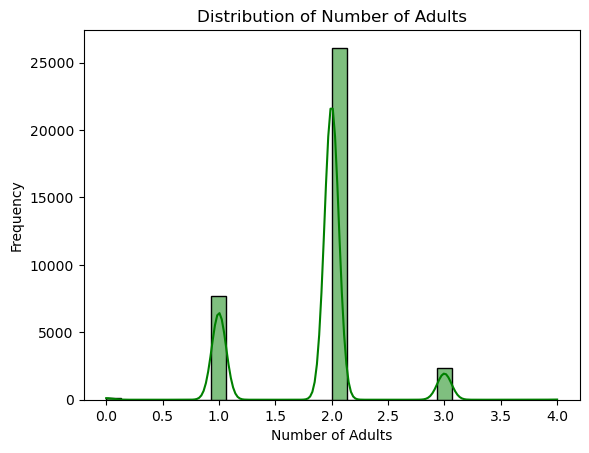

In [373]:
sns.histplot(df['no_of_adults'], bins=30, kde=True, color='green')
plt.title('Distribution of Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()


In [374]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,0
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,0
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,0
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,0
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,0
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,0
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,0
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,0


In [375]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [376]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [378]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

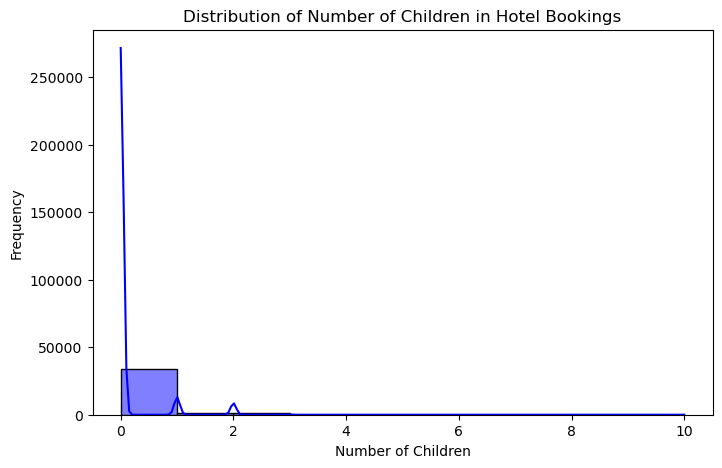

In [379]:

plt.figure(figsize=(8,5))
sns.histplot(df['no_of_children'], bins=10, kde=True, color='blue')

plt.title('Distribution of Number of Children in Hotel Bookings')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

plt.show()


In [385]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

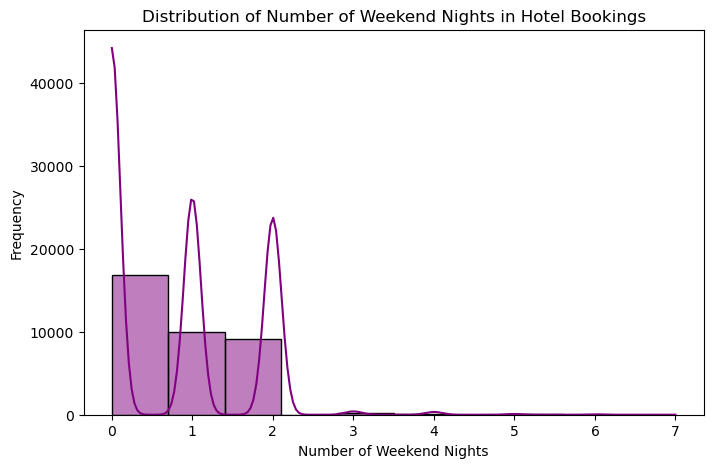

In [386]:

plt.figure(figsize=(8,5))
sns.histplot(df['no_of_weekend_nights'], bins=10, kde=True, color='purple')

plt.title('Distribution of Number of Weekend Nights in Hotel Bookings')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')

plt.show()


In [387]:



def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

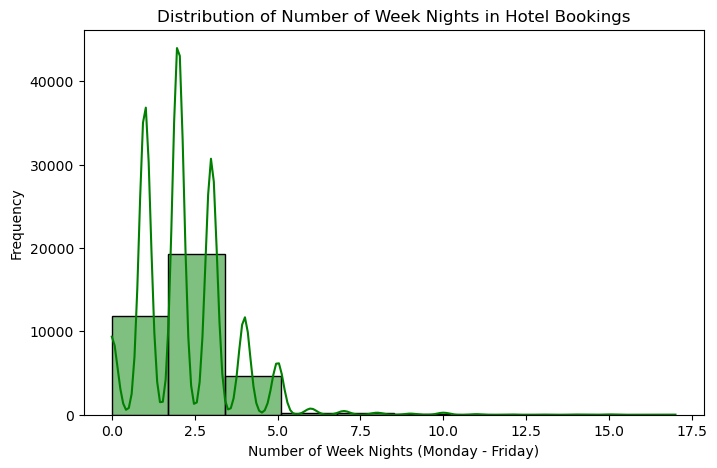

In [388]:

plt.figure(figsize=(8,5))
sns.histplot(df['no_of_week_nights'], bins=10, kde=True, color='green')

plt.title('Distribution of Number of Week Nights in Hotel Bookings')
plt.xlabel('Number of Week Nights (Monday - Friday)')
plt.ylabel('Frequency')

plt.show()


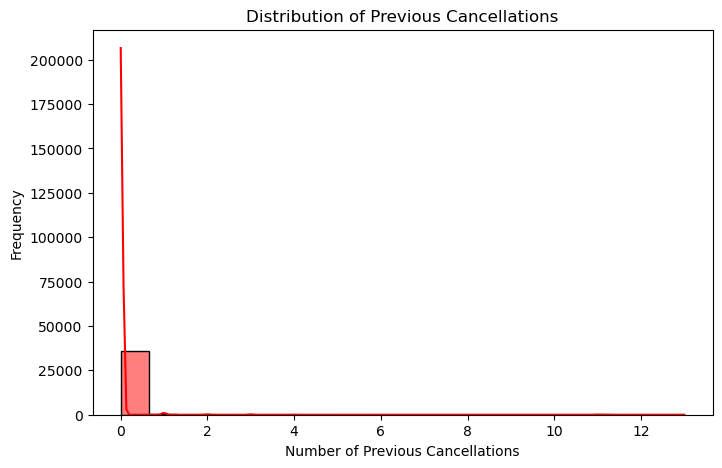

count   36275.00000
mean        0.02335
std         0.36833
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        13.00000
Name: no_of_previous_cancellations, dtype: float64

In [389]:

plt.figure(figsize=(8,5))
sns.histplot(df['no_of_previous_cancellations'], bins=20, kde=True, color='red')
plt.xlabel("Number of Previous Cancellations")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Cancellations")
plt.show()

df['no_of_previous_cancellations'].describe()


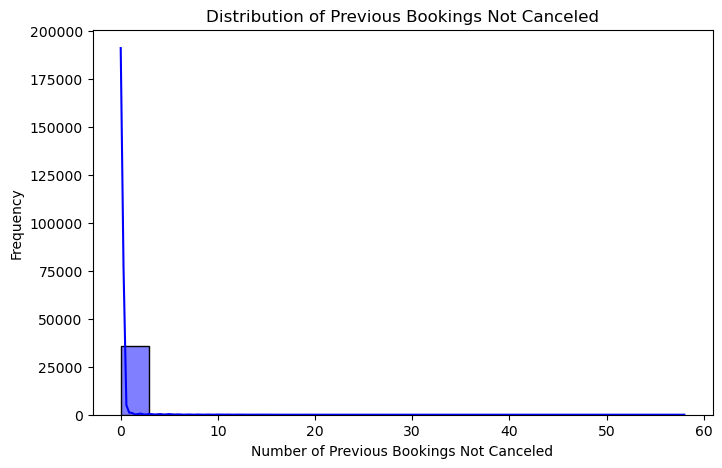

count   36275.00000
mean        0.15341
std         1.75417
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        58.00000
Name: no_of_previous_bookings_not_canceled, dtype: float64

In [390]:
plt.figure(figsize=(8, 5))
sns.histplot(df['no_of_previous_bookings_not_canceled'], bins=20, kde=True, color='blue')
plt.xlabel("Number of Previous Bookings Not Canceled")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Bookings Not Canceled")
plt.show()

df['no_of_previous_bookings_not_canceled'].describe()

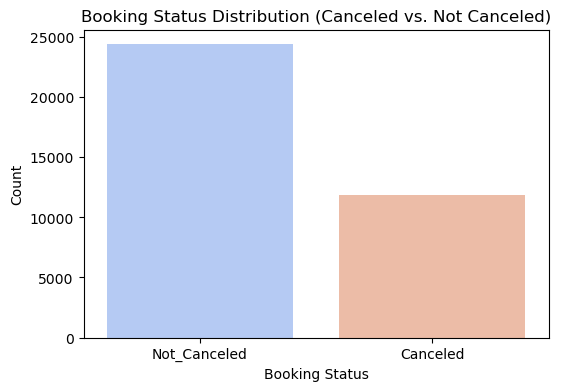

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['booking_status'], palette='coolwarm')
plt.title("Booking Status Distribution (Canceled vs. Not Canceled)")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()


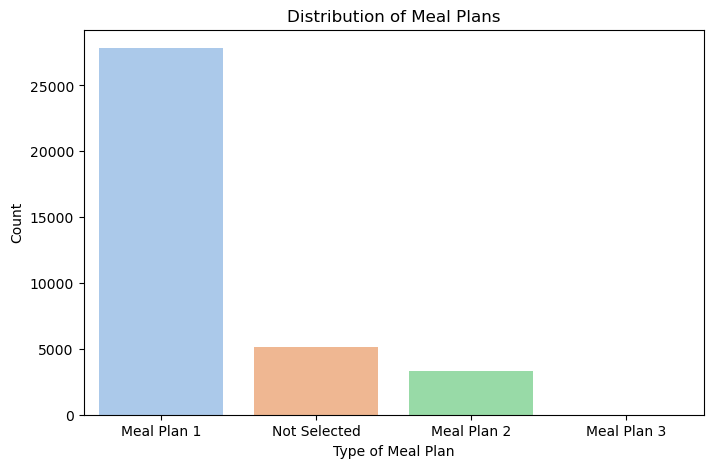

In [393]:

plt.figure(figsize=(8,5))
sns.countplot(x=df['type_of_meal_plan'], palette='pastel')
plt.title("Distribution of Meal Plans")
plt.xlabel("Type of Meal Plan")
plt.ylabel("Count")
plt.show()


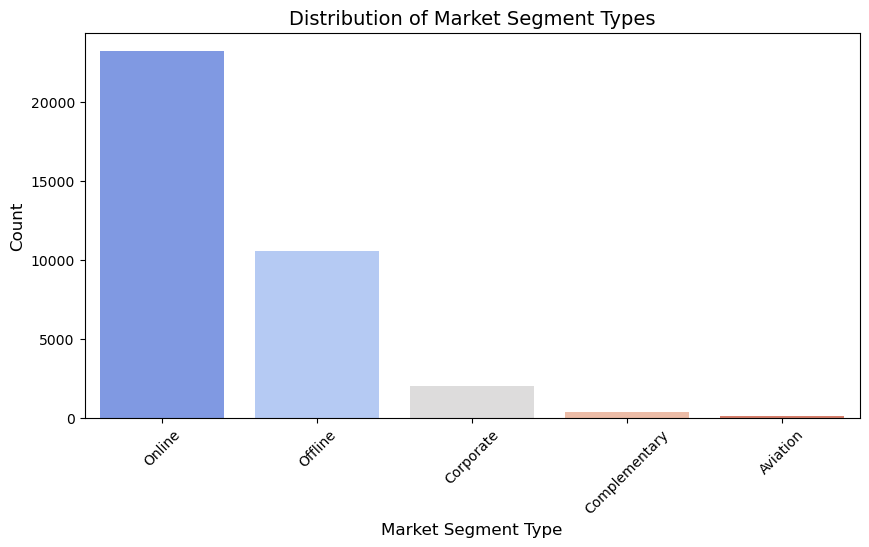

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.countplot(x=df['market_segment_type'], 
              order=df['market_segment_type'].value_counts().index, 
              palette='coolwarm')

plt.title("Distribution of Market Segment Types", fontsize=14)
plt.xlabel("Market Segment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, fontsize=10)

plt.show()



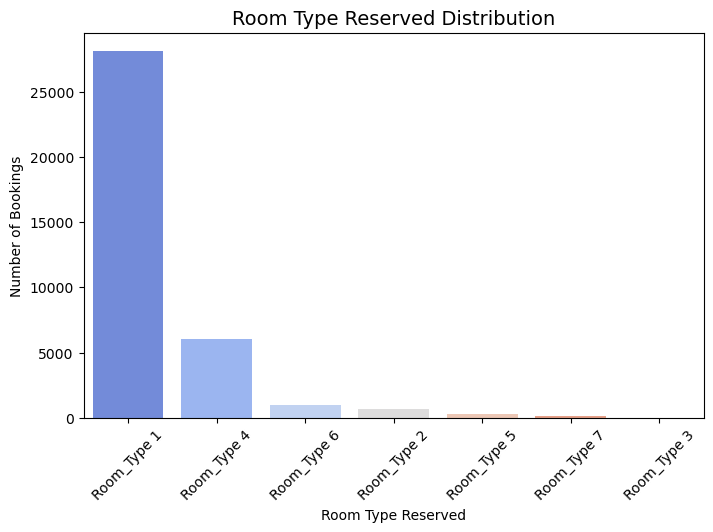

In [395]:

plt.figure(figsize=(8, 5))
sns.countplot(x=df['room_type_reserved'], palette='coolwarm', order=df['room_type_reserved'].value_counts().index)
plt.title("Room Type Reserved Distribution", fontsize=14)
plt.xlabel("Room Type Reserved")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


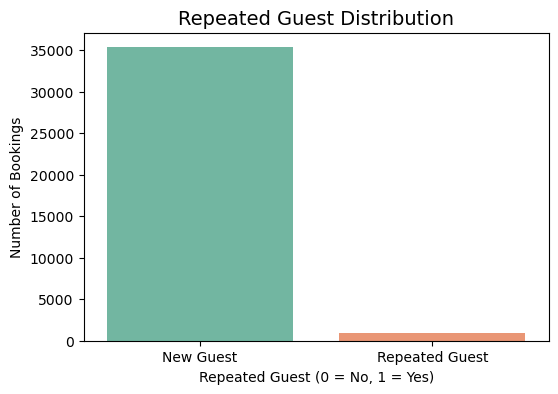

In [396]:

plt.figure(figsize=(6, 4))
sns.countplot(x=df['repeated_guest'], palette='Set2')
plt.title("Repeated Guest Distribution", fontsize=14)
plt.xlabel("Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")
plt.xticks([0, 1], ['New Guest', 'Repeated Guest'])
plt.show()


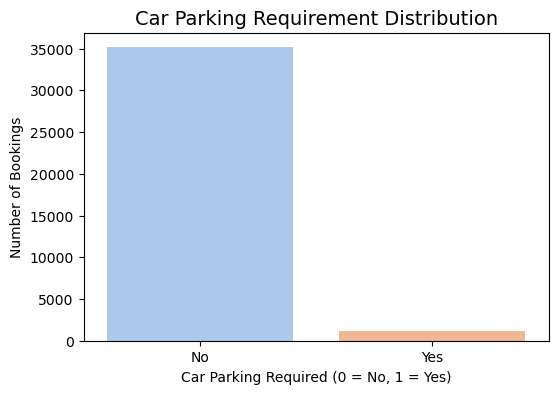

In [397]:

plt.figure(figsize=(6, 4))
sns.countplot(x=df['required_car_parking_space'], palette='pastel')
plt.title("Car Parking Requirement Distribution", fontsize=14)
plt.xlabel("Car Parking Required (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


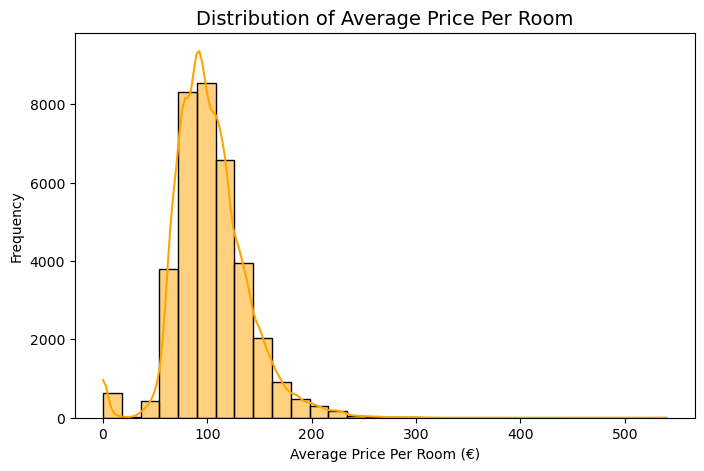

In [398]:

plt.figure(figsize=(8, 5))
sns.histplot(df['avg_price_per_room'], bins=30, kde=True, color="orange")
plt.title("Distribution of Average Price Per Room", fontsize=14)
plt.xlabel("Average Price Per Room (€)")
plt.ylabel("Frequency")
plt.show()


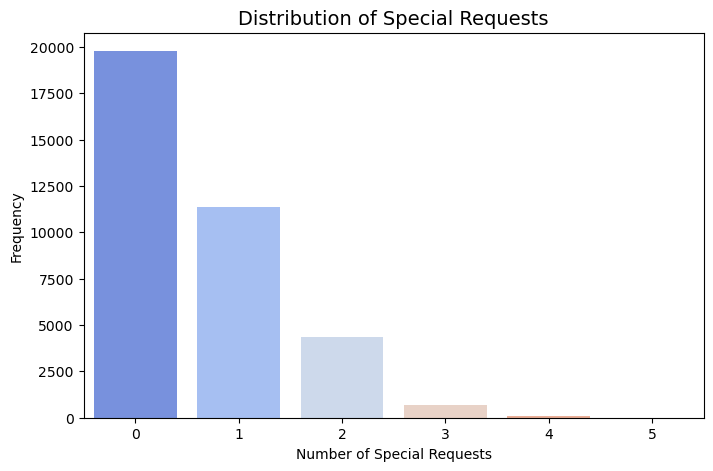

In [399]:

plt.figure(figsize=(8, 5))
sns.countplot(x=df['no_of_special_requests'], palette="coolwarm")
plt.title("Distribution of Special Requests", fontsize=14)
plt.xlabel("Number of Special Requests")
plt.ylabel("Frequency")
plt.show()


### Bivariate Analysis

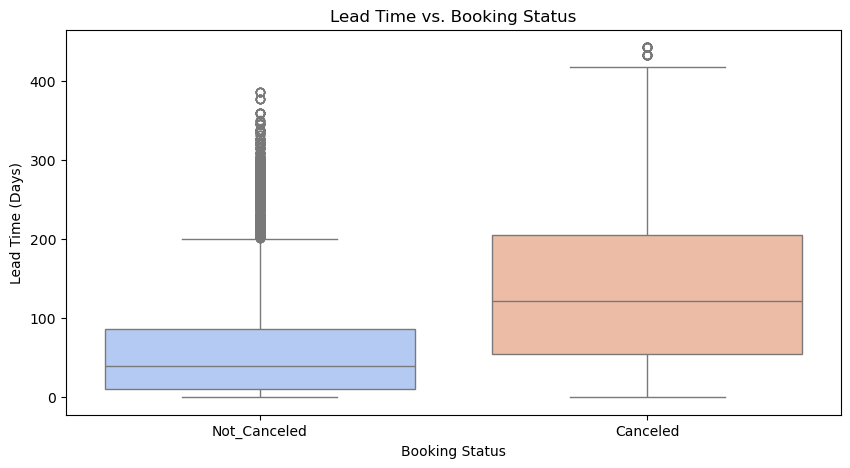

In [402]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['booking_status'], y=df['lead_time'], palette="coolwarm")
plt.title("Lead Time vs. Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (Days)")
plt.show()


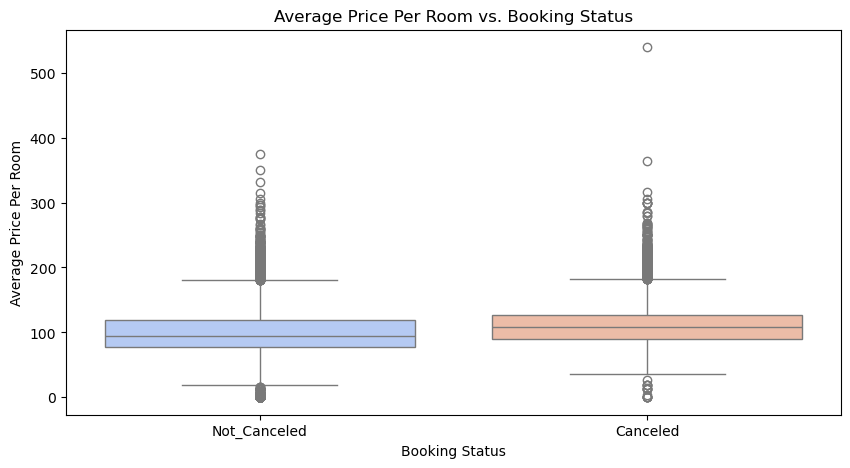

In [403]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['booking_status'], y=df['avg_price_per_room'], palette="coolwarm")
plt.title("Average Price Per Room vs. Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Average Price Per Room")
plt.show()


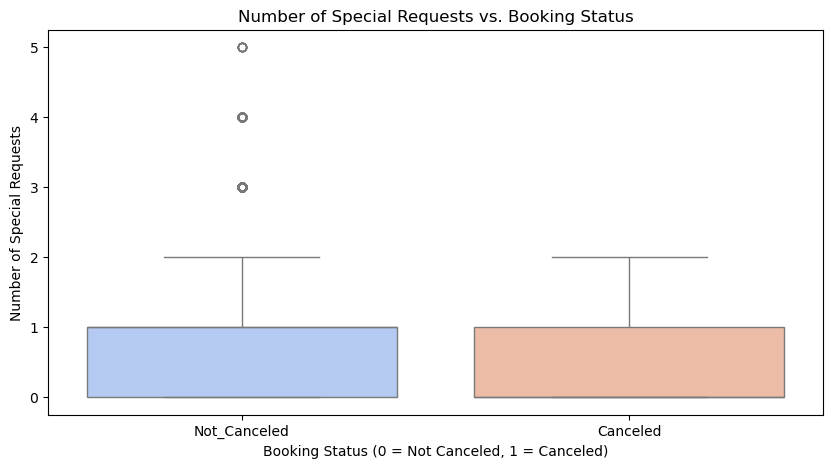

In [409]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.boxplot(x=df['booking_status'], y=df['no_of_special_requests'], palette="coolwarm")

plt.title("Number of Special Requests vs. Booking Status")
plt.xlabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of Special Requests")

plt.show()


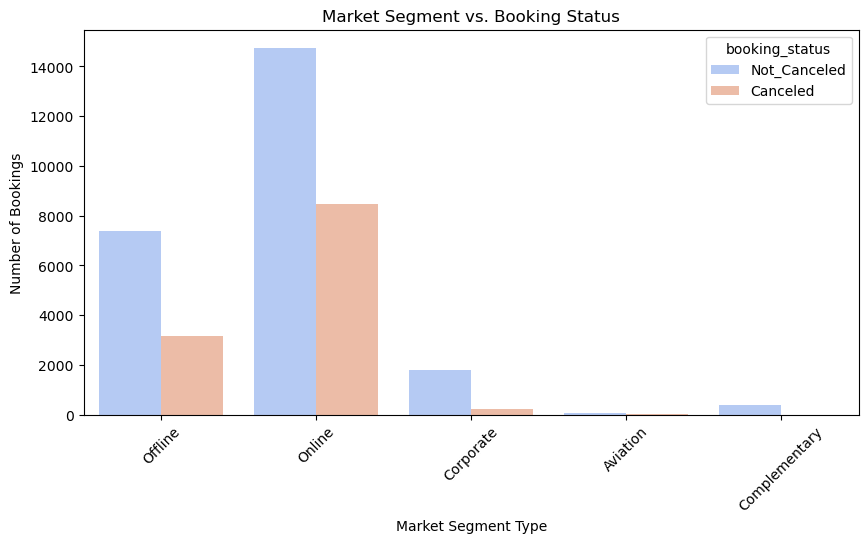

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df['market_segment_type'], hue=df['booking_status'], palette="coolwarm")

plt.title("Market Segment vs. Booking Status")
plt.xlabel("Market Segment Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.show()


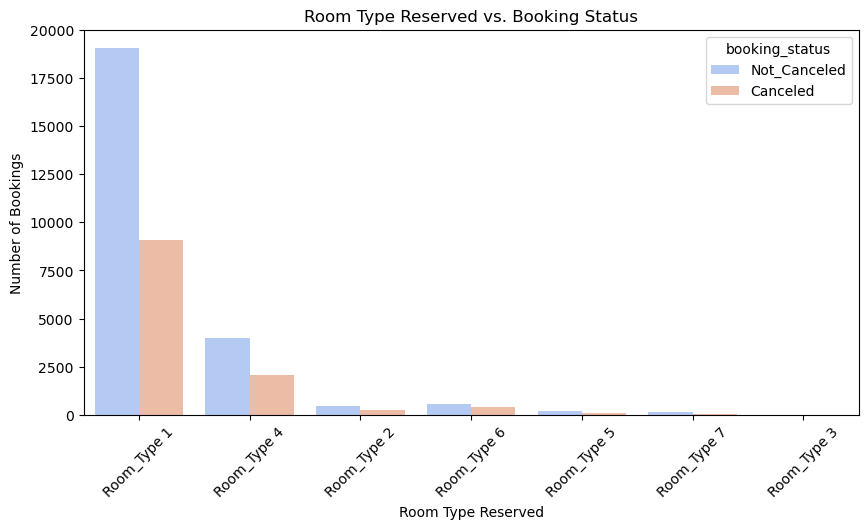

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df['room_type_reserved'], hue=df['booking_status'], palette="coolwarm")

plt.title("Room Type Reserved vs. Booking Status")
plt.xlabel("Room Type Reserved")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)

plt.show()


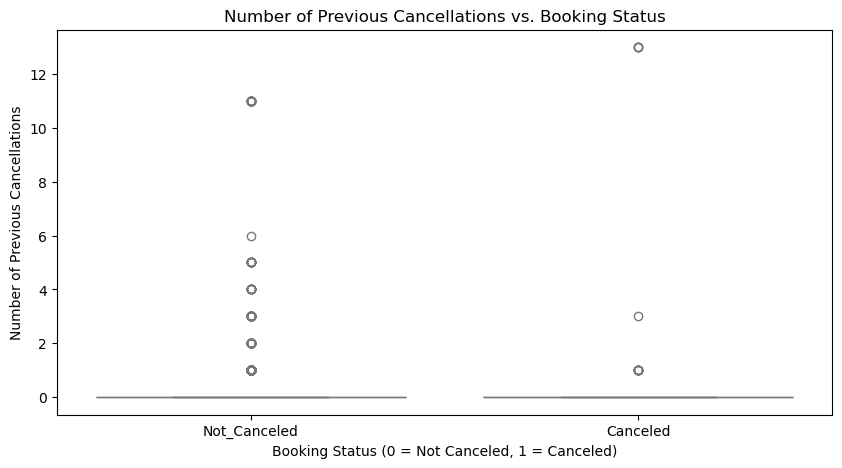

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['booking_status'], y=df['no_of_previous_cancellations'], palette="coolwarm")

plt.title("Number of Previous Cancellations vs. Booking Status")
plt.xlabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of Previous Cancellations")

plt.show()


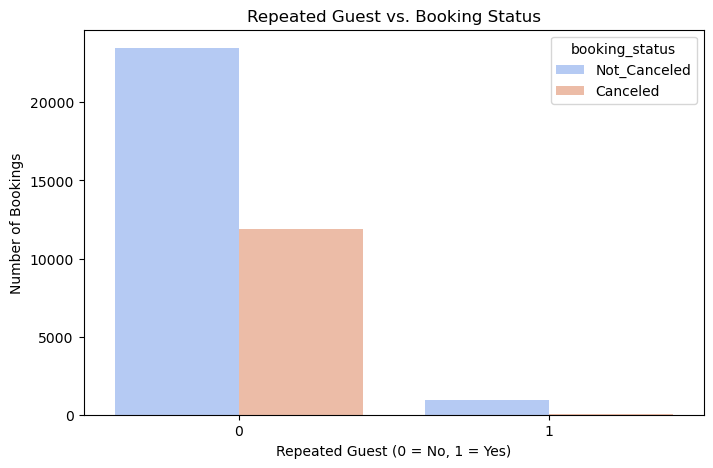

In [415]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df['repeated_guest'], hue=df['booking_status'], palette="coolwarm")

plt.title("Repeated Guest vs. Booking Status")
plt.xlabel("Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")

plt.show()


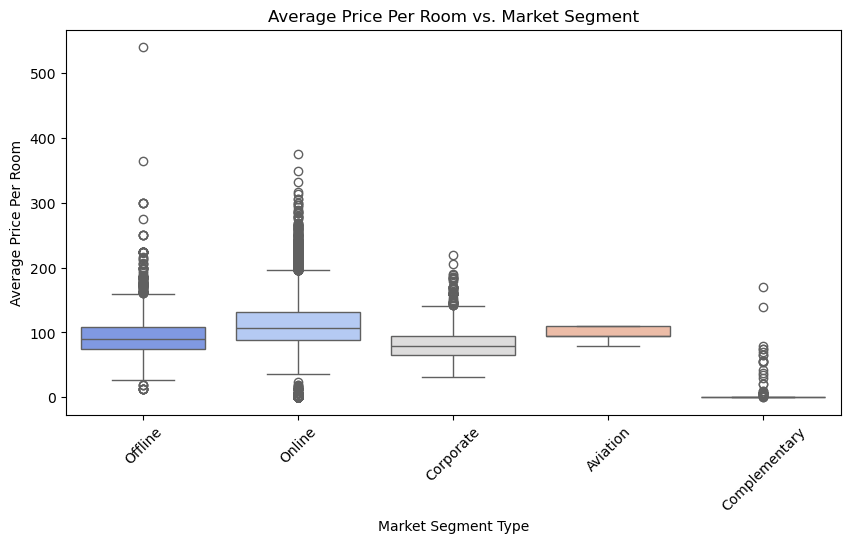

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['market_segment_type'], y=df['avg_price_per_room'], palette="coolwarm")

plt.title("Average Price Per Room vs. Market Segment")
plt.xlabel("Market Segment Type")
plt.ylabel("Average Price Per Room")
plt.xticks(rotation=45)

plt.show()


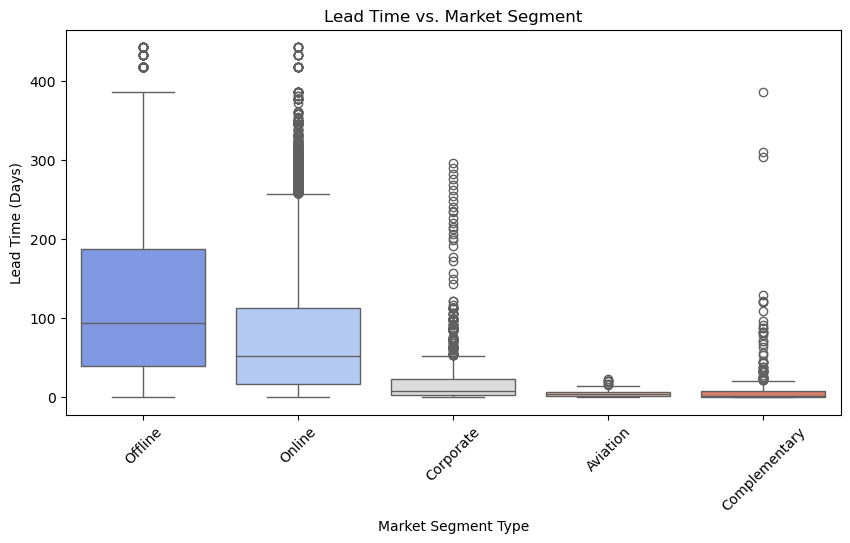

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['market_segment_type'], y=df['lead_time'], palette="coolwarm")

plt.title("Lead Time vs. Market Segment")
plt.xlabel("Market Segment Type")
plt.ylabel("Lead Time (Days)")
plt.xticks(rotation=45)

plt.show()


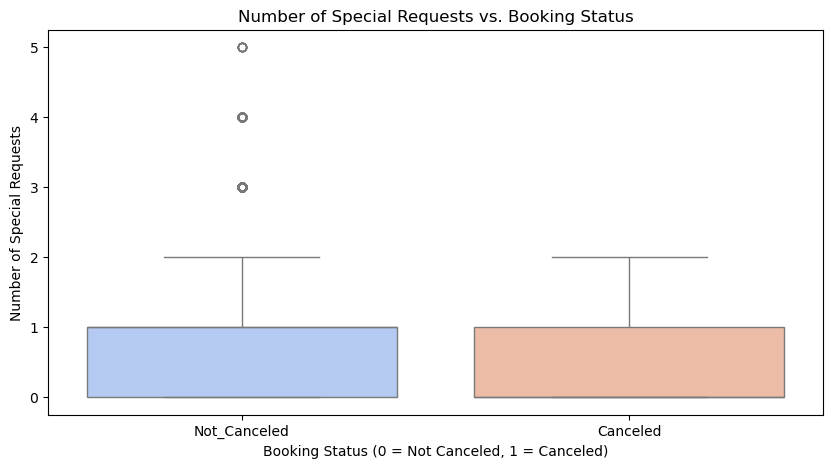

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['booking_status'], y=df['no_of_special_requests'], palette="coolwarm")

plt.title("Number of Special Requests vs. Booking Status")
plt.xlabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Number of Special Requests")

plt.show()


In [276]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [277]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


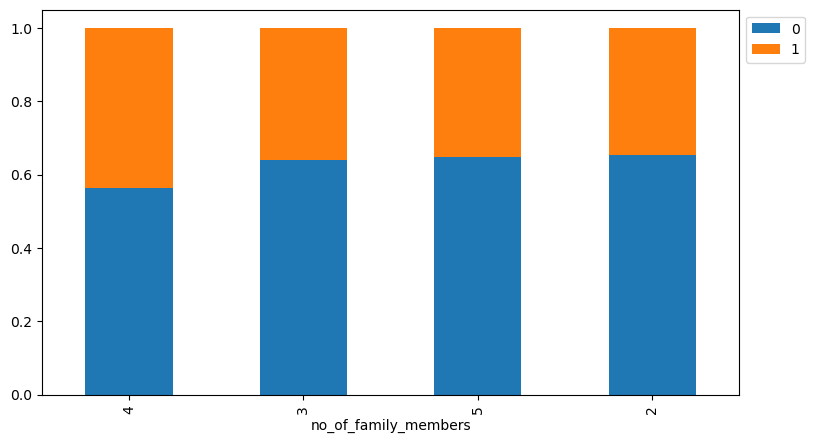

In [278]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

In [419]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [420]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

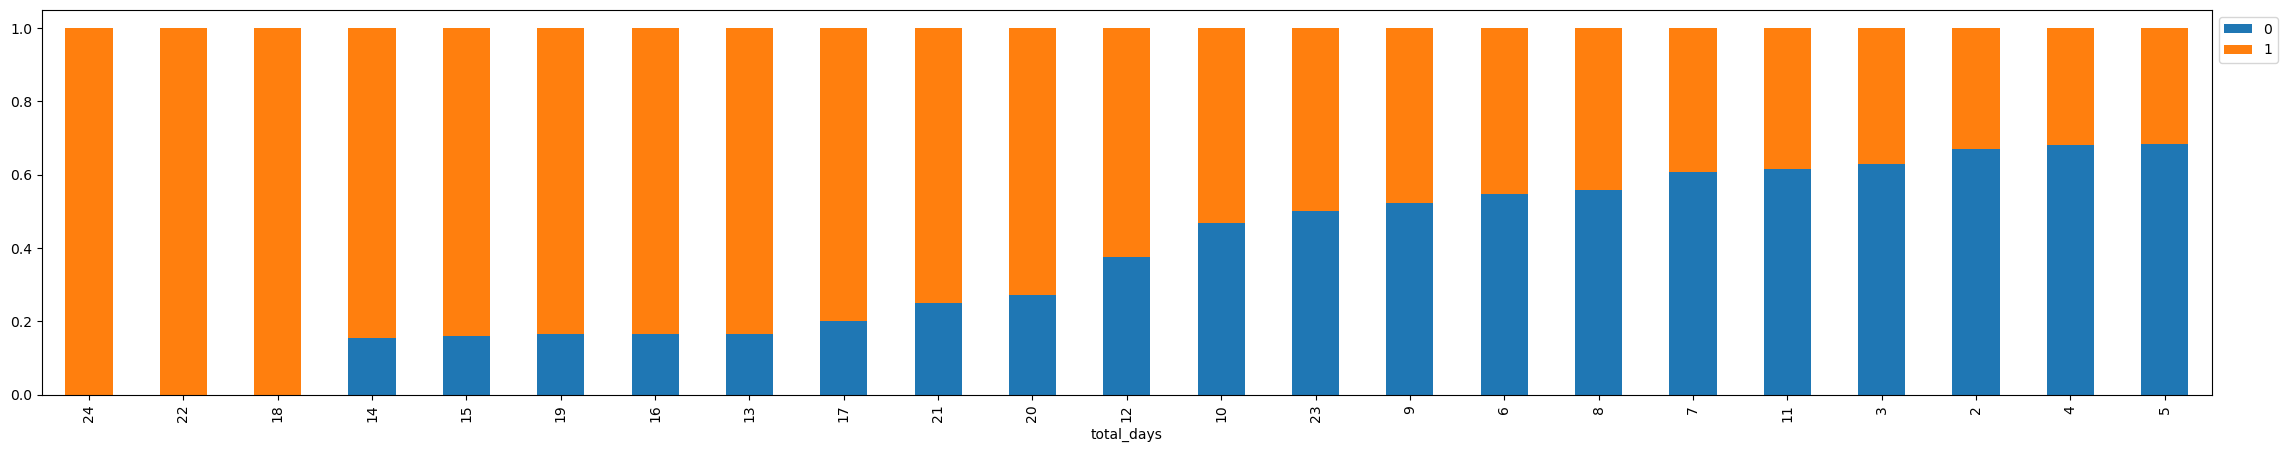

In [421]:
stacked_barplot(stay_data, "total_days", "booking_status")

# Heatmap

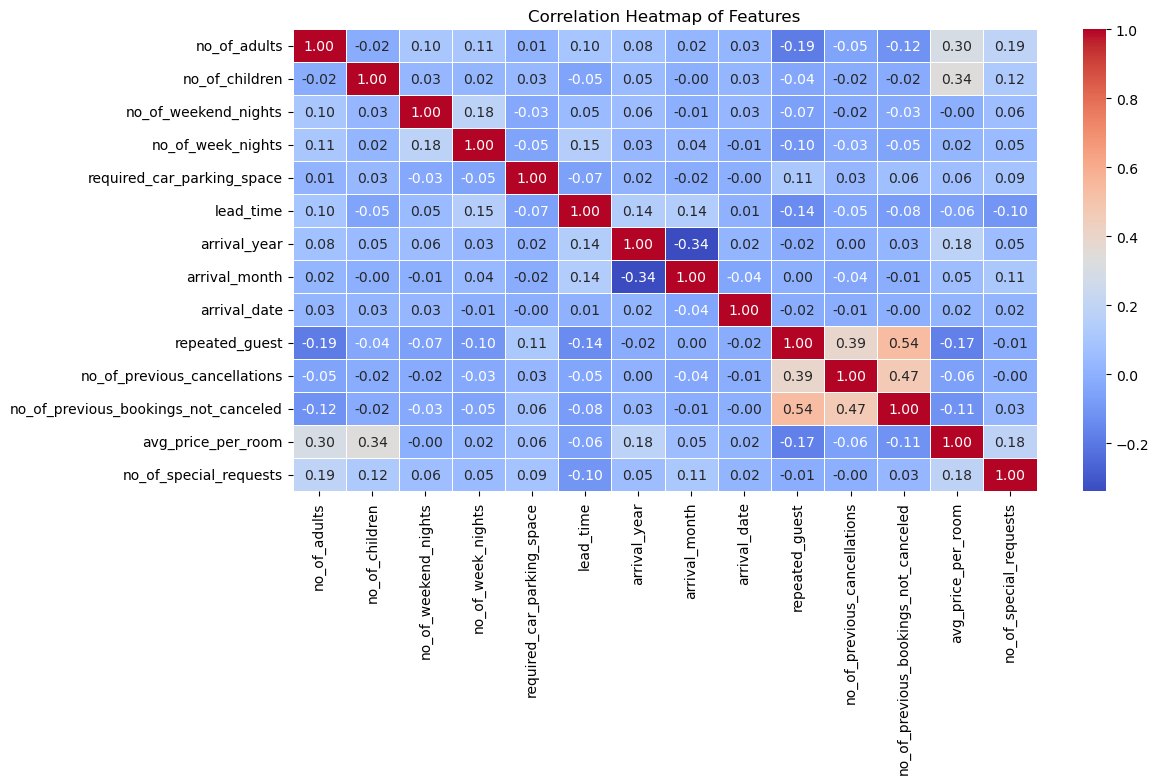

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Features")

plt.show()


# Overall Booking Cancellation Rate

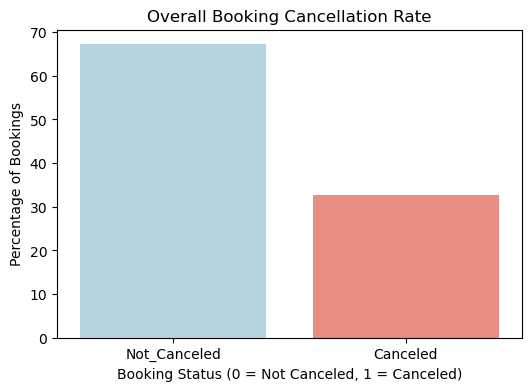

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the overall cancellation rate
cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100

# Plot a bar graph for overall cancellation rate
plt.figure(figsize=(6, 4))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette=['lightblue', 'salmon'])

# Set labels and title
plt.xlabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Percentage of Bookings")
plt.title("Overall Booking Cancellation Rate")

# Show the plot
plt.show()


# EDA Questions

## 1. What are the busiest months in the hotel?

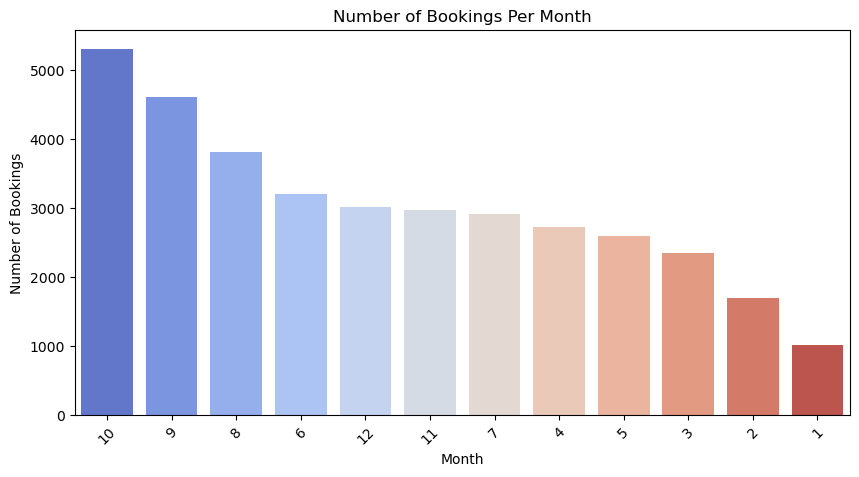

In [425]:

plt.figure(figsize=(10, 5))
sns.countplot(x=df['arrival_month'], palette="coolwarm", order=df['arrival_month'].value_counts().index)
plt.title("Number of Bookings Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


## 2.Which market segment do most of the guests come from?

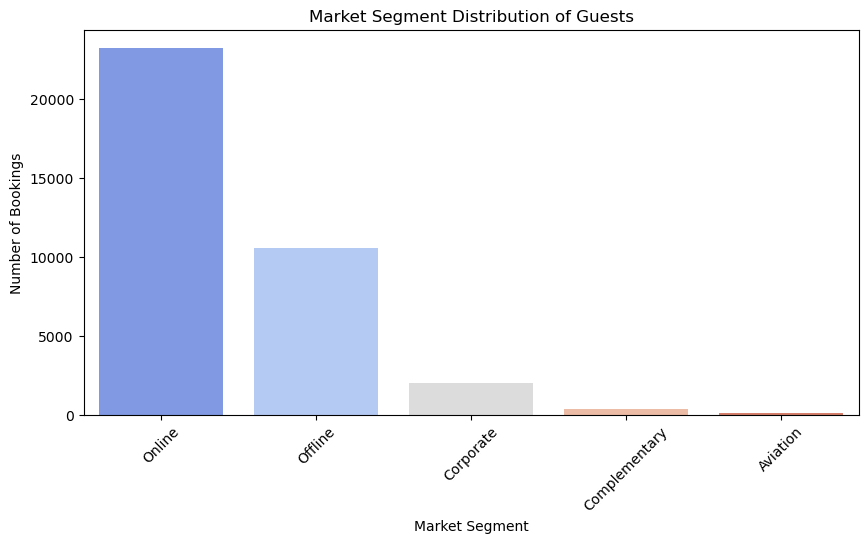

In [426]:

plt.figure(figsize=(10, 5))
sns.countplot(x=df['market_segment_type'], palette="coolwarm", order=df['market_segment_type'].value_counts().index)
plt.title("Market Segment Distribution of Guests")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


## 3.Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

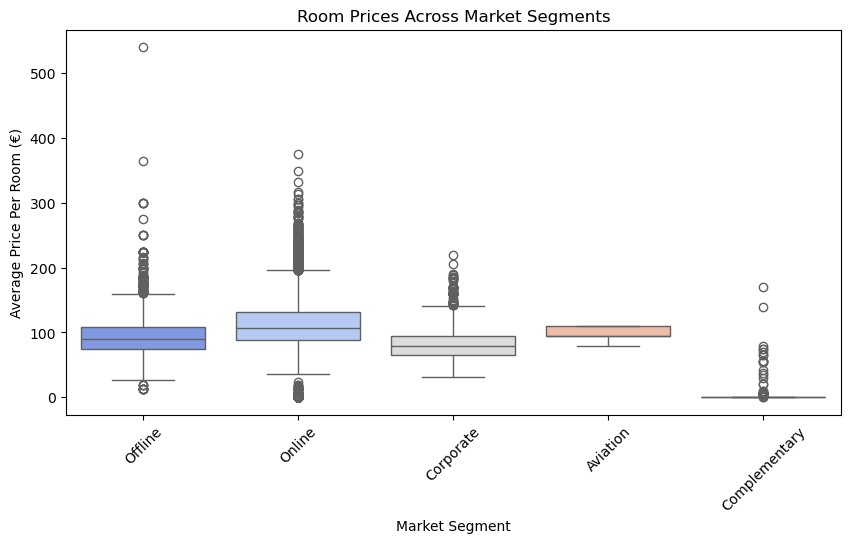

In [427]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['market_segment_type'], y=df['avg_price_per_room'], palette="coolwarm")
plt.title("Room Prices Across Market Segments")
plt.xlabel("Market Segment")
plt.ylabel("Average Price Per Room (€)")
plt.xticks(rotation=45)
plt.show()


## 4. What percentage of bookings are canceled?

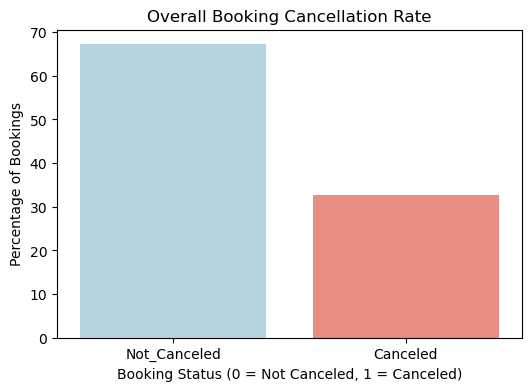

In [429]:

cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette=['lightblue', 'salmon'])
plt.xlabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Percentage of Bookings")
plt.title("Overall Booking Cancellation Rate")
plt.show()


## 5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

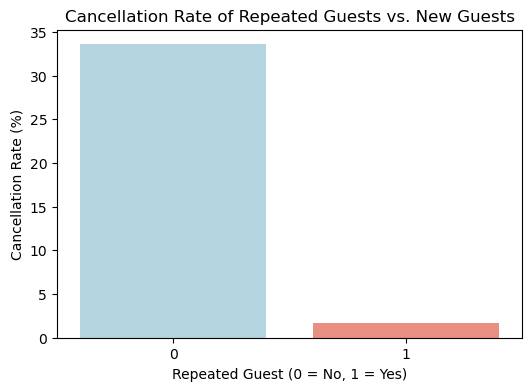

In [430]:

df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

plt.figure(figsize=(6, 4))
sns.barplot(x=df.groupby('repeated_guest')['booking_status'].mean().index,
            y=df.groupby('repeated_guest')['booking_status'].mean() * 100, palette=['lightblue', 'salmon'])
plt.xlabel("Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate of Repeated Guests vs. New Guests")
plt.show()


## 6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

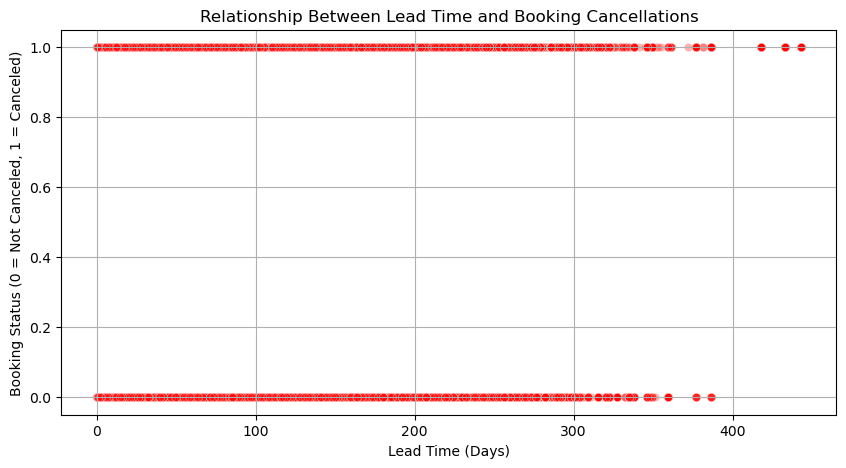

In [431]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['lead_time'], y=df['booking_status'], alpha=0.3, color='red')

plt.xlabel("Lead Time (Days)")
plt.ylabel("Booking Status (0 = Not Canceled, 1 = Canceled)")
plt.title("Relationship Between Lead Time and Booking Cancellations")
plt.grid(True)
plt.show()


## Data Preprocessing

## Missing Values Treatment

In [432]:

print(df.isnull().sum())


no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


## Outlier Detection

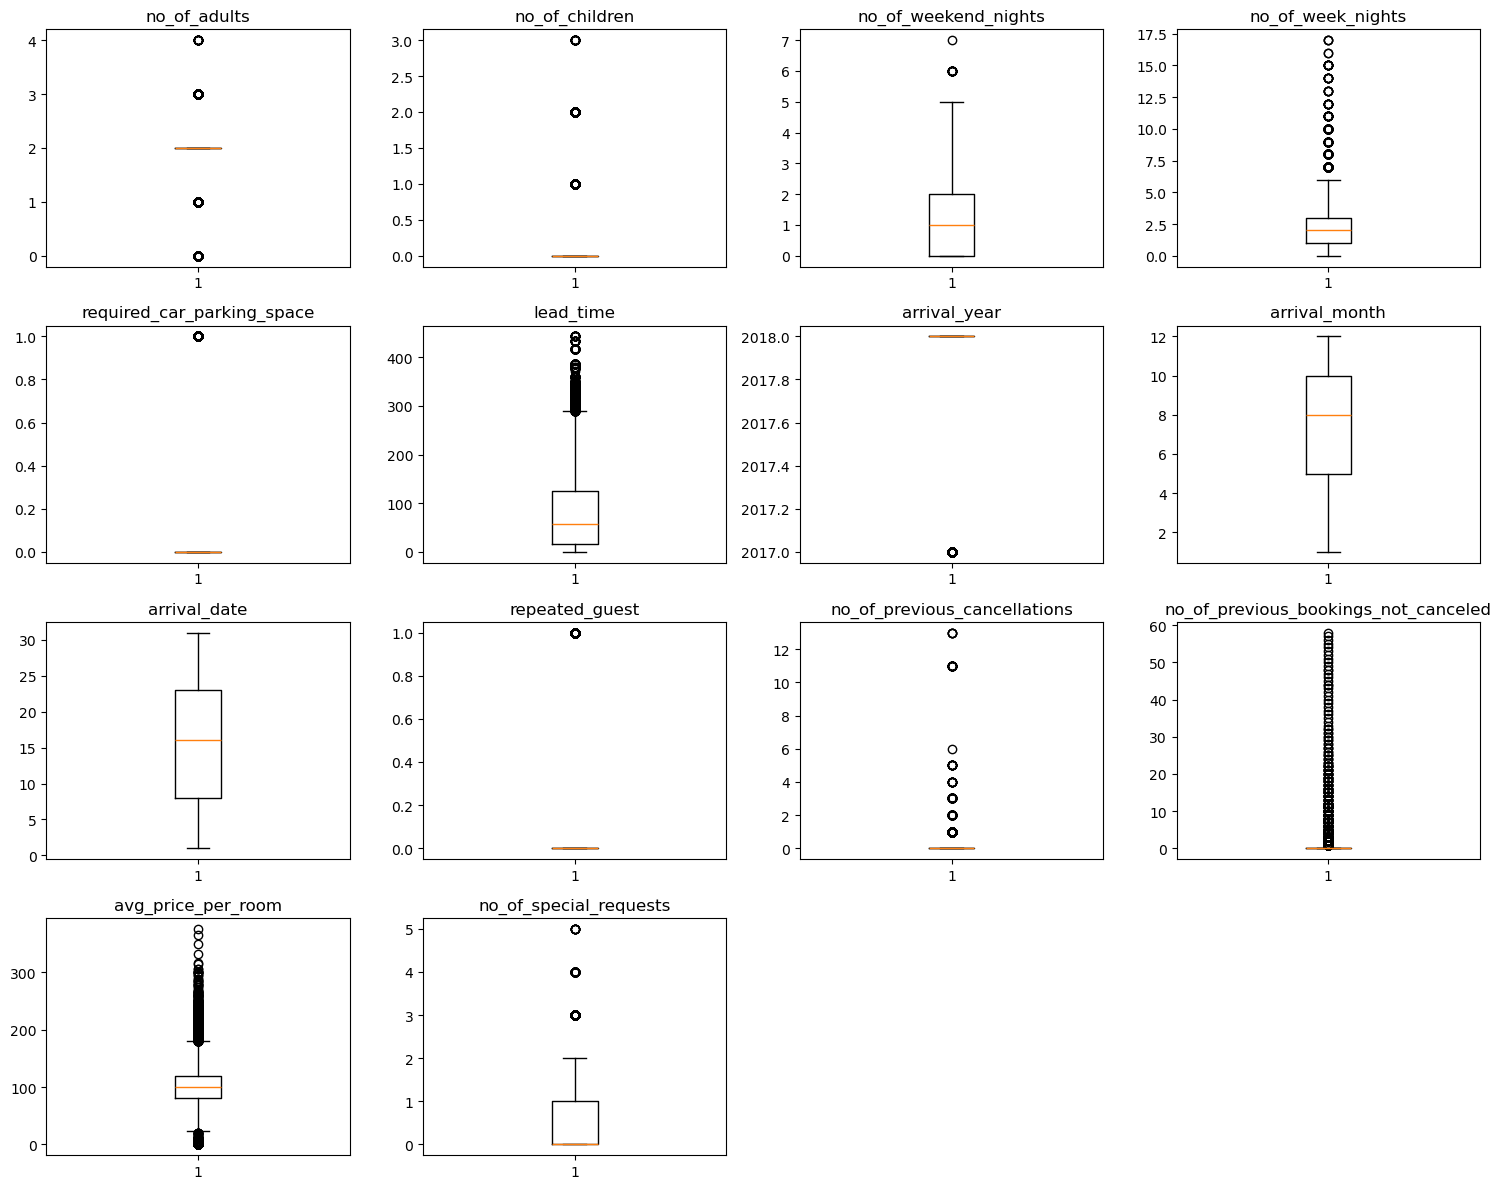

In [434]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Feature Engineering

In [435]:

df['total_guests'] = df['no_of_adults'] + df['no_of_children']
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

print(df[['total_guests', 'total_nights']].head())


   total_guests  total_nights
0             2             3
1             2             5
2             1             3
3             2             2
4             2             2


## Data Scaling

In [436]:
from sklearn.preprocessing import StandardScaler

num_cols = ['lead_time', 'avg_price_per_room', 'total_nights', 'total_guests']

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())


   lead_time  avg_price_per_room  total_nights  total_guests
0    1.61490            -1.09503      -0.00841       0.07651
1   -0.93370             0.09281       1.11141       0.07651
2   -0.98025            -1.23753      -0.00841      -1.46119
3    1.46361            -0.09757      -0.56833       0.07651
4   -0.43329            -0.25431      -0.56833       0.07651


# Train - Test Split

In [437]:

X = df.drop(columns=['booking_status'])  # Features
y = df['booking_status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (29020, 19), Testing set: (7255, 19)


In [438]:

print("Training Set Class Distribution:\n", y_train.value_counts(normalize=True) * 100)
print("\nTesting Set Class Distribution:\n", y_test.value_counts(normalize=True) * 100)



Training Set Class Distribution:
 booking_status
0   67.23639
1   32.76361
Name: proportion, dtype: float64

Testing Set Class Distribution:
 booking_status
0   67.23639
1   32.76361
Name: proportion, dtype: float64


# Model Building

## Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

In [439]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [444]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


#### Building Logistic Regression Model

In [445]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.3292
Time:                        19:46:52   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

### Impact of Incorrect Predictions and Optimization Strategy

A predictive model can generate two types of incorrect predictions:

False Negative: The model predicts that a customer will not cancel their booking, but in reality, the customer cancels.

False Positive: The model predicts that a customer will cancel their booking, but in reality, the customer does not cancel.

### Significance of Both Cases
Both misclassifications carry significant implications for the hotel:

False Negative (Underestimating Cancellations):

Leads to inefficient resource allocation.

Results in financial losses due to unoccupied rooms.

Increases reliance on last-minute discounts or third-party distribution channels, impacting profitability.

False Positive (Overestimating Cancellations):

The hotel may assume the booking will be canceled and allocate fewer resources.

Could result in suboptimal service, negatively impacting customer satisfaction and brand reputation.

### Optimizing Model Performance
To minimize these risks, the hotel should focus on optimizing the F1 Score, which balances precision and recall. A higher F1 Score reduces both False Positives and False Negatives, ensuring a more reliable prediction model and improved operational efficiency.

In [449]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [450]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Observations**
### Interpreting Logistic Regression Coefficients and Addressing Multicollinearity
Negative Coefficients: A negative coefficient indicates that an increase in the corresponding attribute decreases the probability of a customer canceling their booking.

Positive Coefficients: A positive coefficient suggests that as the attribute value increases, the likelihood of cancellation also increases.

Significance of Variables (p-value):

The p-value of a variable determines whether it significantly impacts the model.

If the p-value is less than 0.05 (5% significance level), the variable is considered statistically significant.

### Addressing Multicollinearity
Impact of Multicollinearity:

Multicollinearity among variables can distort the coefficient estimates and affect the reliability of p-values.

This may lead to incorrect inferences about which features are truly influencing booking cancellations.

Detecting Multicollinearity:

One effective method for identifying multicollinearity is the Variance Inflation Factor (VIF).

High VIF values indicate a strong correlation between predictor variables, suggesting the need for remedial action.

Mitigating Multicollinearity:

Removing highly correlated variables.

Using dimensionality reduction techniques such as Principal Component Analysis (PCA).

Applying regularization techniques like Lasso Regression.

By addressing multicollinearity, we ensure that the model provides accurate and meaningful insights for predicting hotel booking cancellations.


## Tuning The Models To Imporve Performance

In [453]:
print(X.dtypes)


no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                               float64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
total_guests                            float64
total_nights                            float64
dtype: object


In [455]:
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding


In [463]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

y_pred_tuned = best_dt.predict(X_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Confusion Matrix:
[[4393  485]
 [ 461 1916]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4878
           1       0.80      0.81      0.80      2377

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255


Accuracy Score: 0.8696071674707099

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}

Tuned Model Accuracy: 0.8822880771881461

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4878
           1       0.83      0.81      0.82      2377

    accuracy                           0.88      7255
   macro avg       0.87      0.86      0.87      7255
weighted avg       0.88      0.88      0.88      7255



In [482]:
print("Training performance:")
model_performance_classification_statsmodels(y_train, X_train.astype(float), y_train.astype(float))

Training performance:


AttributeError: 'Series' object has no attribute 'predict'

### Multicollinearity

In [473]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [474]:
checking_vif(X_train.astype(float))

,feature,VIF
0,no_of_adults,inf
1,no_of_children,inf
2,no_of_weekend_nights,inf
3,no_of_week_nights,inf
4,required_car_parking_space,1.03845
5,lead_time,1.39181
6,arrival_year,1.42840
7,arrival_month,1.27419
8,arrival_date,1.00676
9,repeated_guest,1.78344


**Observations**

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

### Dropping high p-value variables

We will eliminate predictor variables with a p-value greater than 0.05, as they do not have a statistically significant impact on the target variable. However, since p-values can change after removing a variable, we will not drop all non-significant variables at once. Instead, we will follow an iterative approach:

Build the initial model and examine the p-values of all variables.

Identify and remove the variable with the highest p-value.

Rebuild the model without the dropped variable and re-evaluate the p-values.

Repeat this process until all remaining variables have p-values less than or equal to 0.05.

While this process can be performed manually by identifying and eliminating high p-value variables one by one, it can be time-consuming. Automating the process using a loop ensures efficiency and consistency in model refinement.

In [475]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train.astype(float)[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'total_guests', 'total_nights', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [476]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [477]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28999
Method:                           MLE   Df Model:                           20
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.3248
Time:                        20:50:17   Log-Likelihood:                -12393.
converged:                       True   LL-Null:                       -18355.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_weekend_nights            -313.8825     37.499     -8.370      0.000    -387.379    -240.386
no_of_week_nights               -313.9893     37.499     -8.373      0.

In [478]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80300,0.62695,0.73312,0.67589


* All the variables left have p-value<0.05.
* So we can say that lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.

### Coefficient interpretations

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

#### Let's check the performance on the test set

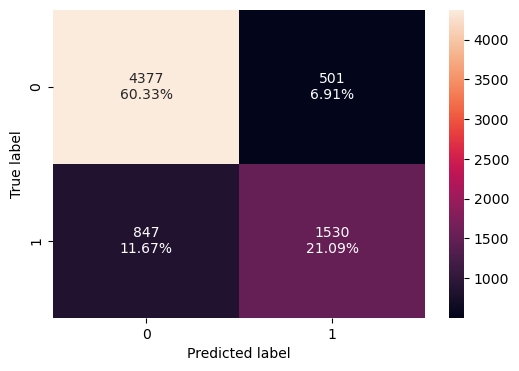

In [484]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float))

In [300]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float)
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [301]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

,Odds,Change_odd%
const,0.00000,-100.00000
no_of_adults,1.11491,11.49096
no_of_children,1.16546,16.54593
no_of_weekend_nights,1.11470,11.46966
no_of_week_nights,1.04258,4.25841
required_car_parking_space,0.20296,-79.70395
lead_time,1.01583,1.58331
arrival_year,1.57195,57.19508
arrival_month,0.95839,-4.16120
repeated_guest,0.06478,-93.52180


### Coefficient interpretations

Odds Ratio Interpretation for Booking Cancellations
Impact of Guest Composition

Number of Adults: A one-unit increase in the number of adults increases the odds of cancellation by 1.11 times (11.49%), holding all other factors constant.

Number of Children: Each additional child increases the odds of cancellation by 1.16 times (16.54%), suggesting that bookings with more children are more prone to cancellation.

Effect of Stay Duration

Number of Weekend Nights: A one-night increase in weekend stays raises the odds of cancellation by 1.11 times (11.46%).

Number of Week Nights: A one-night increase in weekday stays increases the odds of cancellation by 1.04 times (4.25%).

Booking Preferences and Lead Time

Car Parking Requirement: Guests requiring a parking space are 79.70% less likely to cancel compared to those who do not. This suggests that parking needs may indicate a more committed booking.

Lead Time: A one-day increase in lead time raises the odds of cancellation by 1.01 times (1.58%), highlighting that advance bookings are more volatile.

Customer Commitment Indicators

Number of Special Requests: Each additional special request reduces the odds of cancellation by 77%, suggesting that customers with specific preferences are more committed.

Pricing and Financial Considerations

Average Price per Room: A one-unit increase in price increases the odds of cancellation by 1.01 times (1.93%), implying that higher-priced bookings are more prone to cancellation, possibly due to financial constraints or price sensitivity.

Meal Plan Selection

No Meal Plan Selected: Customers who do not select a meal plan are 1.33 times (33.10%) more likely to cancel their booking than those who do, suggesting that meal plan selection is an indicator of booking commitment.


`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

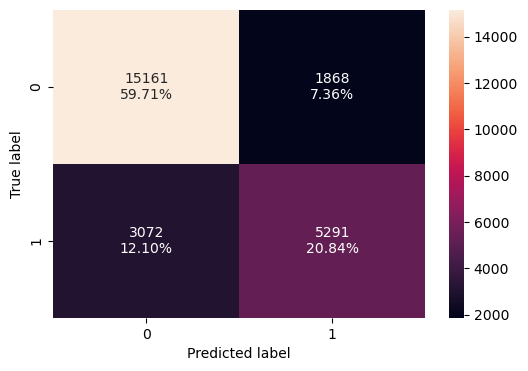

In [302]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

In [303]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float)
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


#### ROC-AUC
* ROC-AUC on training set

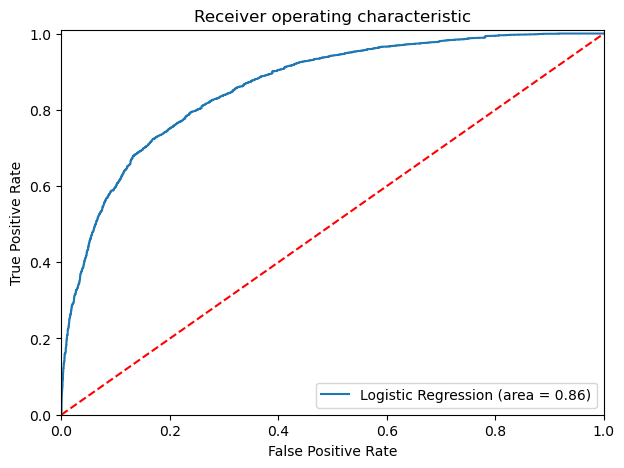

In [488]:
logit_roc_auc_train = roc_auc_score(y_train.astype(float), lg1.predict(X_train1.astype(float).astype(float)))
fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [490]:

fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.30359275715688977


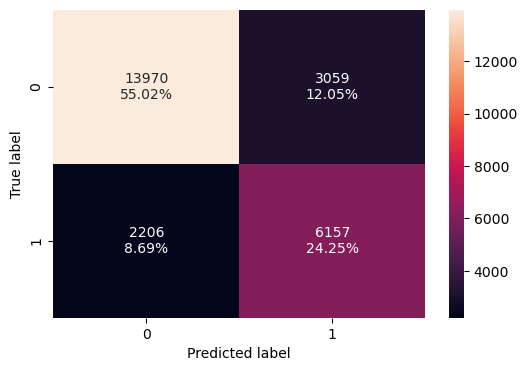

In [306]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)

In [307]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


* Recall has increased significantly as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.

#### Let's check the performance on the test set

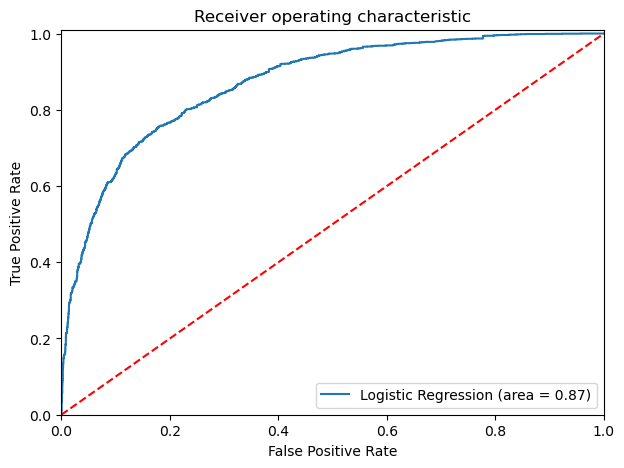

In [491]:
logit_roc_auc_train = roc_auc_score(y_test.astype(float), lg1.predict(X_test1.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), lg1.predict(X_test1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

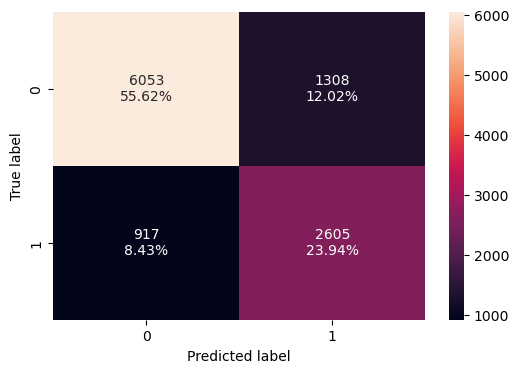

In [309]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc)

In [492]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78029,0.79849,0.62994,0.70427


#### Let's use Precision-Recall curve and see if we can find a better threshold

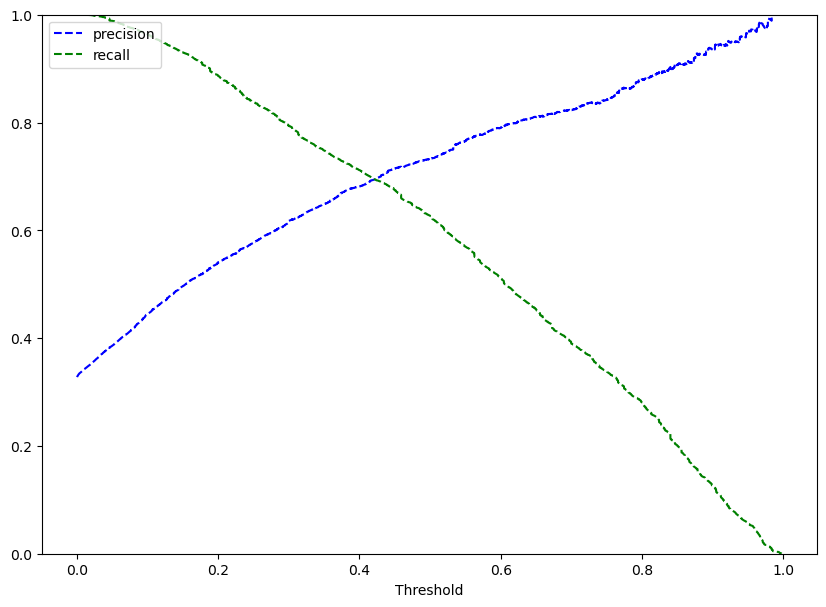

In [496]:
y_scores = lg1.predict(X_train1.astype(float))
prec, rec, tre = precision_recall_curve(y_train.astype(float), y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.42 threshold we get a balanced precision and recall.

In [497]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

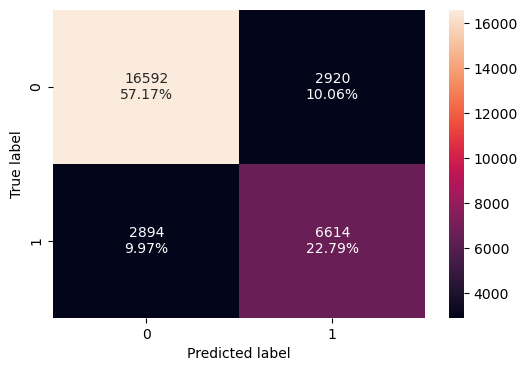

In [498]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve)

In [499]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79966,0.69562,0.69373,0.69467


* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

#### Let's check the performance on the test set

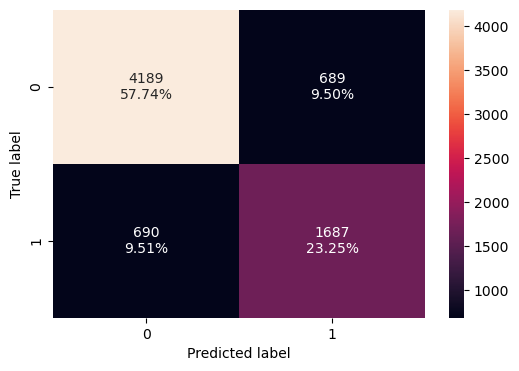

In [500]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve)

In [501]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80992,0.70972,0.71002,0.70987


### Model performance summary

In [503]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.79966
Recall,0.63267,0.73622,0.69562
Precision,0.73907,0.66808,0.69373
F1,0.68174,0.70049,0.69467


In [504]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.78029,0.80992
Recall,0.63089,0.79849,0.70972
Precision,0.72900,0.62994,0.71002
F1,0.67641,0.70427,0.70987


## Insights from the Logistic Regression Model
The developed logistic regression model enables the hotel to predict booking cancellations with an F1 score of 0.69 on the training set, allowing for strategic marketing and operational planning. The model demonstrates generalized performance across both training and test datasets.

Impact of Threshold Selection
Default Threshold (0.5) - High Precision, Low Recall

The model accurately predicts confirmed bookings, ensuring better customer service and enhanced brand reputation.

However, missed cancellations could lead to inefficient resource allocation (e.g., overbooking risks).

Lower Threshold (0.37) - High Recall, Low Precision

The model effectively identifies potential cancellations, allowing the hotel to optimize resource utilization.

However, the increased false positives may lead to unnecessary overcompensation, potentially harming customer trust and brand value.

Balanced Threshold (0.42) - Trade-off Between Recall and Precision

Provides a balanced approach, reducing resource wastage while maintaining brand equity.

Ensures a moderate level of cancellation prediction without significantly impacting customer satisfaction.

Interpretation of Model Coefficients
Negative Coefficients (Reduced Cancellation Probability):

Required Car Parking Space, Arrival Month, Repeated Guest, Number of Special Requests

An increase in these features reduces cancellation likelihood, suggesting that loyal customers or those with specific requirements are more committed to their bookings.

Positive Coefficients (Increased Cancellation Probability):

Number of Adults, Number of Children, Number of Weekend & Weeknights, Lead Time, Average Price per Room, Not Selecting a Meal Plan

Higher values in these features increase the likelihood of cancellation, indicating that longer stays, higher prices, and last-minute decisions contribute to booking uncertainty.

### Decision Tree

#### Data Preparation for modeling (Decision Tree)

In [505]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [506]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


### Building Decision Tree Model

In [321]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [322]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [323]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

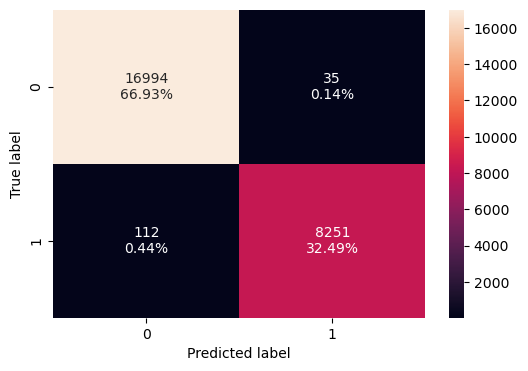

In [324]:
confusion_matrix_sklearn(model, X_train, y_train)

In [325]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

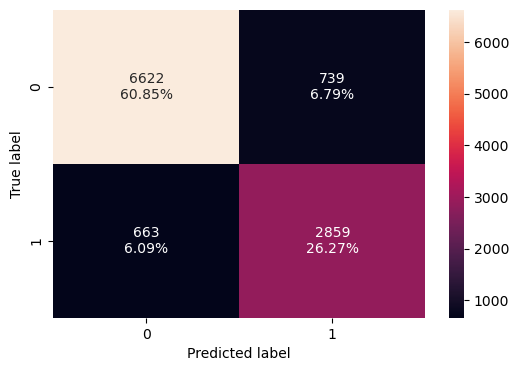

In [326]:
confusion_matrix_sklearn(model, X_test, y_test)

In [327]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

**Before pruning the tree let's check the important features.**

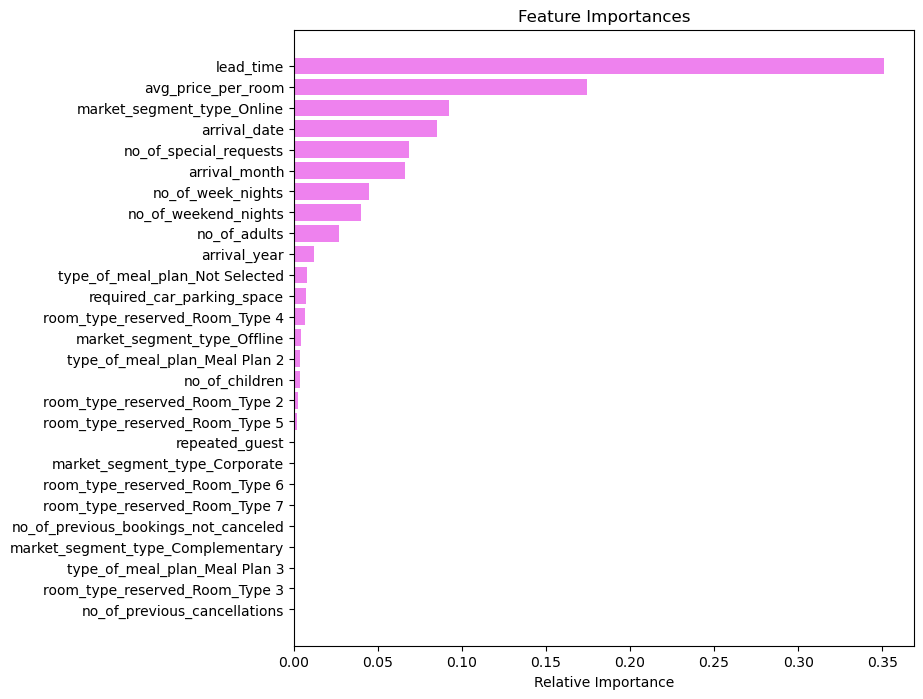

In [328]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important feature followed by average price per room.
* Now let's prune the tree to see if we can reduce the complexity.

### Pruning the tree

**Pre-Pruning**

In [510]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

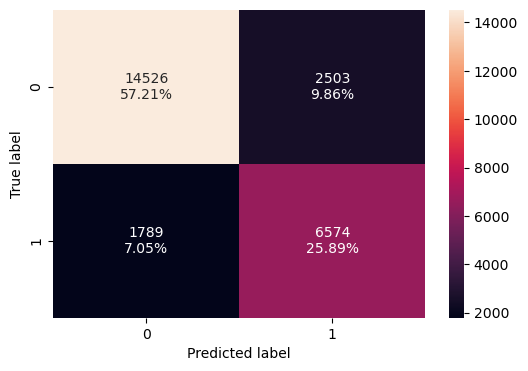

In [511]:
confusion_matrix_sklearn(estimator, X_train.astype(float), y_train.astype(float))

In [514]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


#### Checking performance on test set

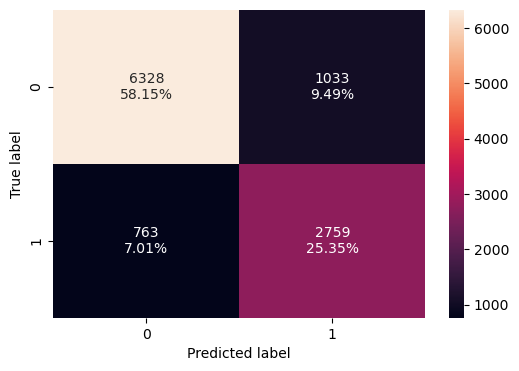

In [513]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [333]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


### Visualizing the Decision Tree

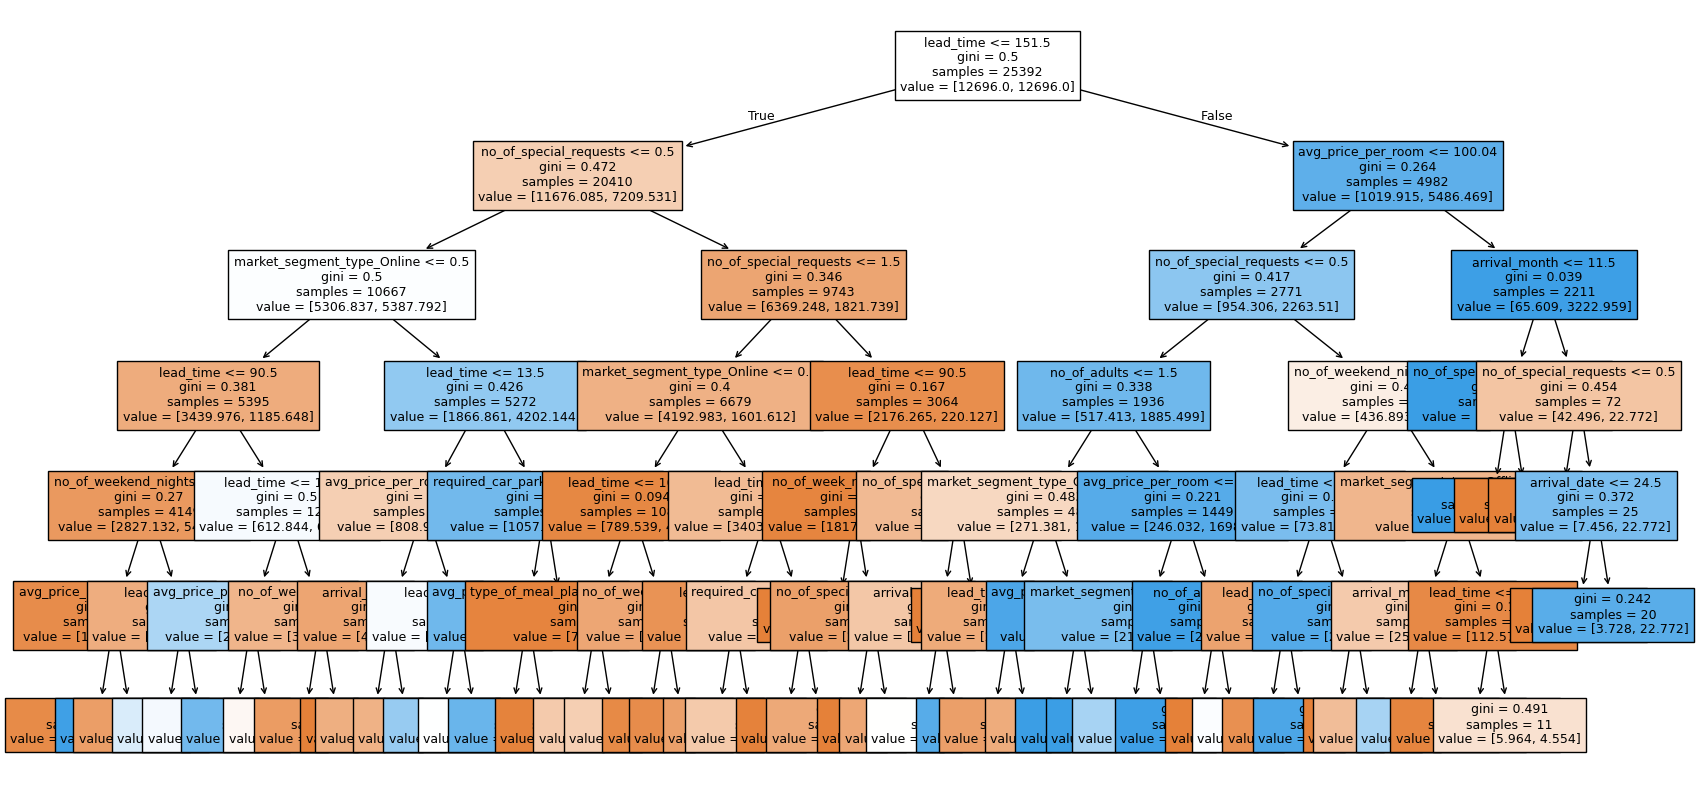

In [515]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [335]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

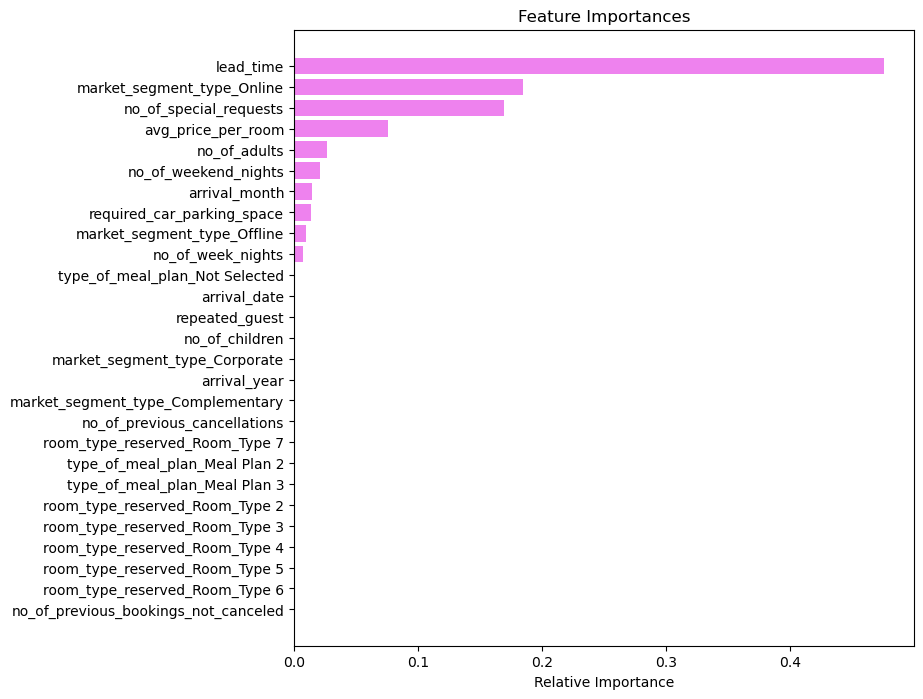

In [336]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations from decision tree

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Lead Time
    * Market Segment - Online
    * Number of special requests
    * Average price per room

**The rules obtained from the decision tree can be interpreted as:**

* The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.

**Bookings made more than 151 days before the date of arrival:**

* If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
* If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.

**Bookings made under 151 days before the date of arrival:**

* If a customer has at least 1 special request the booking is less likely to be cancelled. 
* If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled, if the booking was not done online, it is less likely to be canceled.

`If we want more complex then we can go in more depth of the tree`

**Cost Complexity Pruning**

In [516]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [517]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


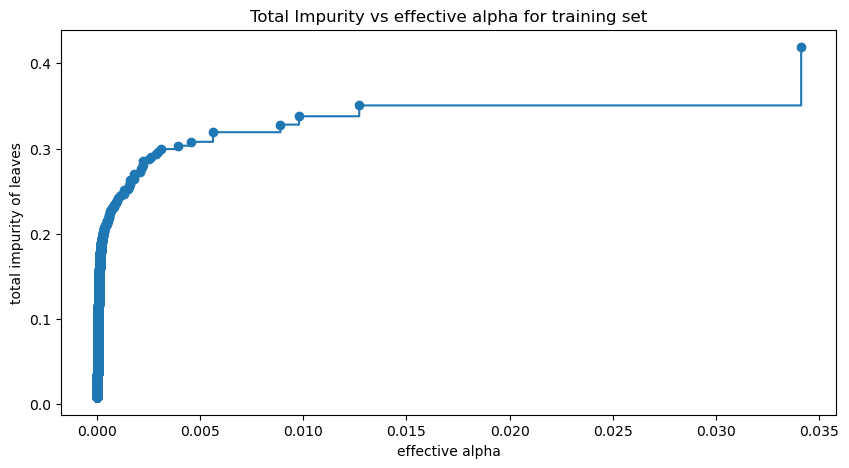

In [518]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [520]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


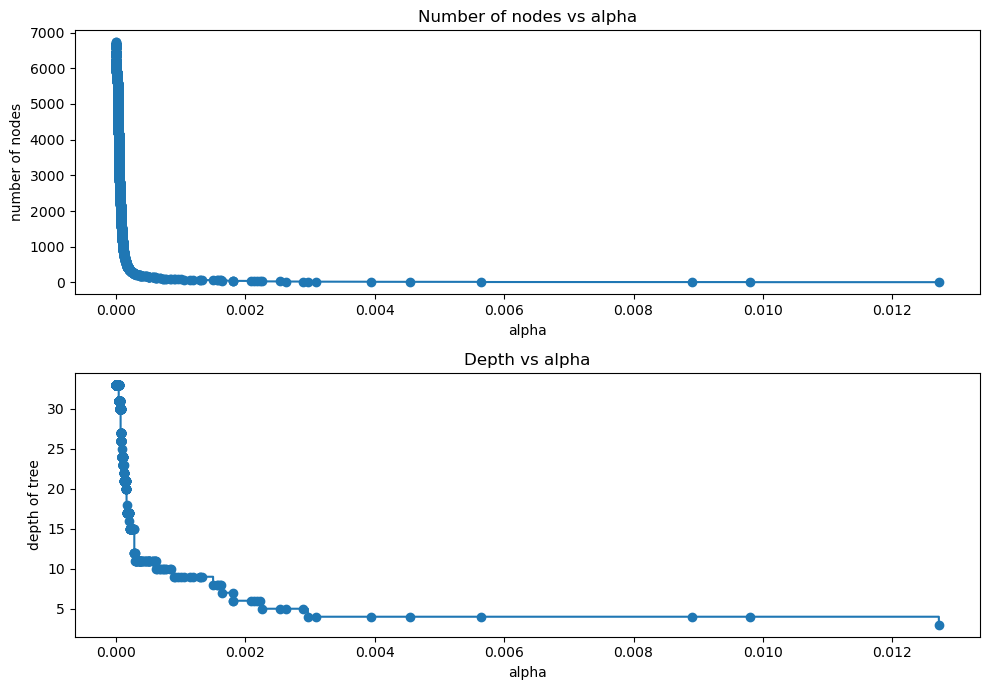

In [522]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [523]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

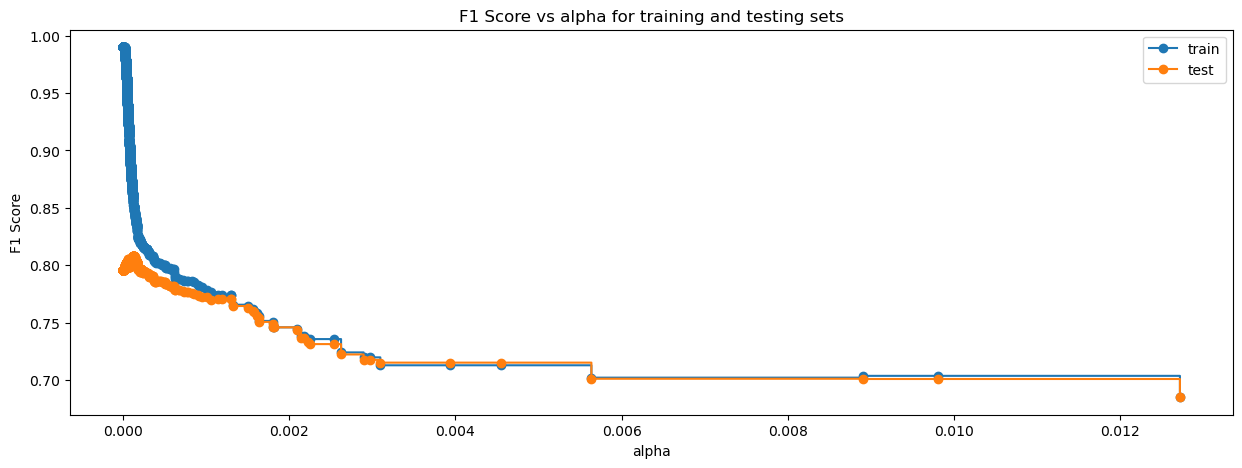

In [524]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [525]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

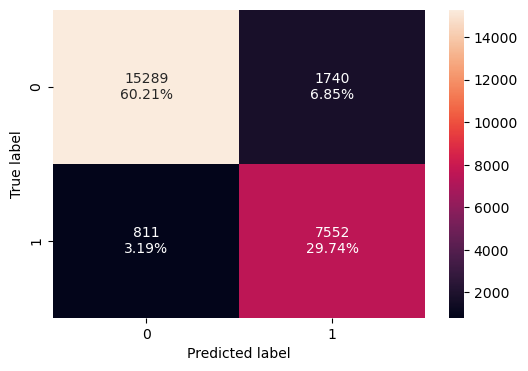

In [526]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [527]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


#### Checking performance on test set

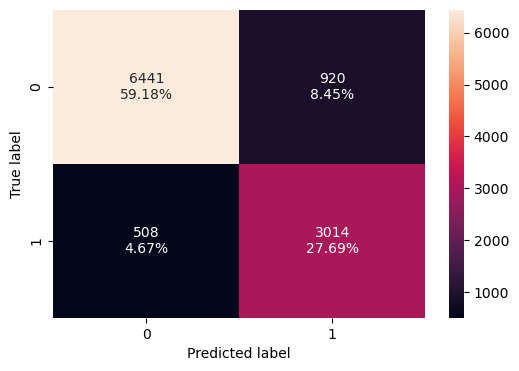

In [528]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

**Observations**
* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from tree**
* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

### Comparing Decision Tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

**Observations**
* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

# Actionable Insights and Recommendations

### Insights

* Overall we can see that the Decision Tree model performs better on the dataset.
* Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
    * Lead Time, Number of special requests, Average price per room are important in both model
    * From the Logistic Regression model we observe that Lead Time, and Average price per room have a positive relation with bookings getting canclled. And the number of special requests has negative relation with bookings getting cancelled.

### Business Recommendations

1. Model Performance & Key Variables
Through rigorous analysis, we identify that the Decision Tree model demonstrates superior performance in predicting booking cancellations. By evaluating key variables using p-values in Logistic Regression and feature importance in the Decision Tree model, we observe the following:

Lead Time, Number of Special Requests, and Average Price per Room emerge as critical factors influencing cancellations in both models.

Lead Time and Average Price per Room show a positive correlation with cancellations—longer lead times and higher room prices increase cancellation probability.

Number of Special Requests exhibits a negative correlation—bookings with special requests are less likely to be canceled.

2. Business Strategy Recommendations
2.1. Enhancing Booking Confirmations & Reducing Cancellations
Implement automated reminders (emails or notifications) for customers nearing their check-in date to confirm their bookings or make modifications.

Provide pre-arrival reminders about cancellation deadlines and penalties to encourage timely decision-making.

Analyze bookings with high lead times and proactively reach out to customers to assess their likelihood of canceling.

2.2. Optimizing Cancellation Policies for Profitability
Stricter refund policies should be applied to high-value bookings, particularly those with special requests, to mitigate financial losses.

Online bookings, which show a higher cancellation rate, should be subject to lower refund percentages to discourage last-minute cancellations.

Transparent cancellation policies should be clearly displayed on hotel websites and booking platforms to ensure customer awareness.

2.3. Managing Length of Stay to Reduce Cancellations
Data suggests that bookings exceeding five days have a higher probability of cancellation.

Implement a two-phase booking process: Allow initial reservations for up to five days, with an option to extend upon reconfirmation.

This policy can be selectively applied—corporate and aviation market segments may be given more flexibility, while leisure travelers may require re-confirmation for longer stays.

2.4. Seasonal Strategy for Resource Allocation
December and January have a lower cancellation ratio—resources should be optimized to handle peak demand.

October and September see the highest number of bookings and cancellations—hotels should investigate the root causes (e.g., promotions, event-driven demand).

2.5. Strengthening Customer Engagement & Loyalty
Post-booking interactions can enhance customer experience and reduce cancellations by reinforcing commitment.

Provide personalized recommendations (local events, attractions, dining options).

Offer exclusive perks for early confirmations.

Loyalty Program for Repeat Guests

Given that repeat guests have a significantly lower cancellation rate, hotels should invest in retaining them.

Introduce personalized discounts, priority check-ins, and exclusive services to encourage repeat bookings.

A well-structured loyalty program fosters long-term relationships and enhances customer lifetime value.

Conclusion
By leveraging predictive analytics, hotels can minimize cancellations, optimize resource allocation, and enhance customer retention. A hybrid approach, combining personalized engagement strategies, dynamic pricing models, and revised cancellation policies, can significantly improve operational efficiency and guest satisfaction.

___